In [1]:
import pandas as pd
from statistics import median
import seaborn as sns
from refuelplot import *
setup()
sns.set_style("darkgrid")

from paths import results_path

In [2]:
results = pd.read_pickle(results_path + '/results_merged.pkl')

In [3]:
results['systemsize3'] = pd.cut(results.systemsize,
                                    pd.IntervalIndex.from_tuples([(0,3),(3,10),(10,20),(20,30),(30,40),(40,50),(50,100),(
                                        100,150),(150,200),(200,1200)]))


# 1. MERRA vs. ERA

very clear in USA and Brazil:
- correlations are higher with ERA5
- RMSE and MBE are lower with ERA5

in NZ and ZAF less clear:
- NZ smaller error with MERRA2, correlation unclear
- ZAF unclear

**-> overall impression: ERA5 is better than MERRA2**

In [ ]:
results[(results.param!='avg')&(results.GWA=='none')&(results.country=='NZ')&
        (results.param=='rmse')&(results.dataset=='ERA5')&(results.value>0.3)]

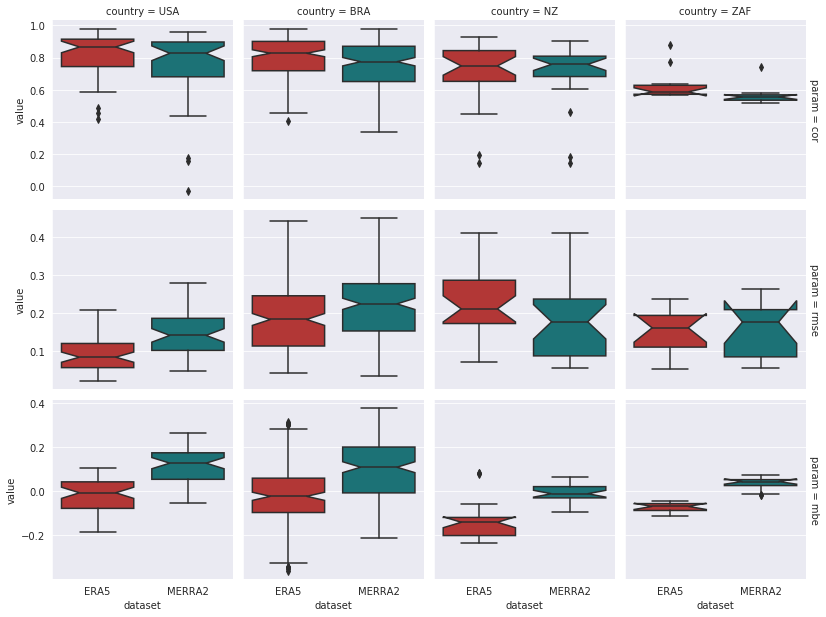

In [107]:
res = results[(results.param!='avg')&(results.GWA=='none')]
sns.catplot(x = 'dataset', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True, sharey='row',notch=True
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.1,left=0.1)
plt.savefig(results_path + '/plots/era5_vs_merra2.png')

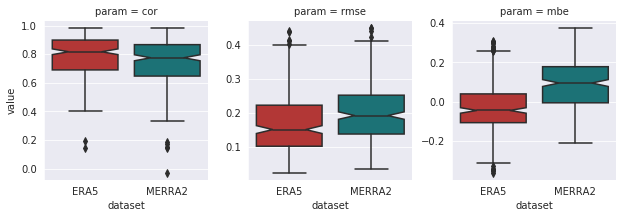

In [4]:
res = results[(results.param!='avg')&(results.GWA=='none')]
sns.catplot(x = 'dataset', y = 'value',col='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True,notch=True, sharey=False
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.15,left=0.1)
plt.savefig(results_path + '/plots/era5_vs_merra2_all.png')

0.8335069184407573

In [146]:
res = results[(results.param!='avg')&(results.GWA=='none')]
print('cor: ERA5 ',round(median(res[(res.param=='cor')&(res.dataset=='ERA5')].value),2),
     'MERRA2 ', round(median(res[(res.param=='cor')&(res.dataset=='MERRA2')].value),2))
print('cor: ERA5 ',round(median(res[(res.param=='rmse')&(res.dataset=='ERA5')].value),2),
     'MERRA2 ', round(median(res[(res.param=='rmse')&(res.dataset=='MERRA2')].value),2))
print('cor: ERA5 ',round(median(res[(res.param=='mbe')&(res.dataset=='ERA5')].value),2),
     'MERRA2 ', round(median(res[(res.param=='mbe')&(res.dataset=='MERRA2')].value),2))

cor: ERA5  0.82 MERRA2  0.77
cor: ERA5  0.15 MERRA2  0.19
cor: ERA5  -0.05 MERRA2  0.09


##### plot differences

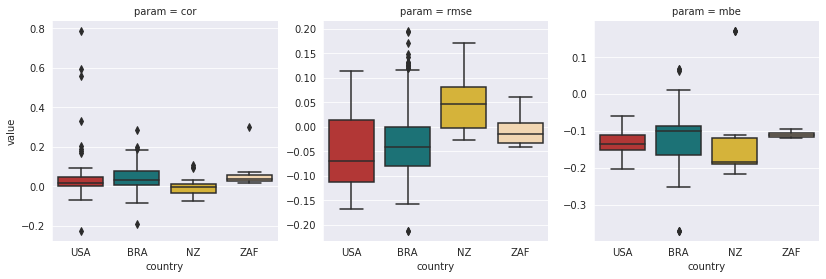

In [5]:
res = results[(results.param!='avg')&(results.GWA=='none')]
dif = res[res.ds=='ERA5'].copy(deep=True).drop(['GWA','dataset','ds','ds2'],axis=1)
dif['value'] = res[res.ds=='ERA5'].value.values-res[res.ds=='MERRA2'].value.values
sns.catplot(x = 'country', y = 'value', col='param',
              kind='box',#hue='dataset',
            height=4, aspect=1,
            data=dif, margin_titles=True, sharey=False
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.15,left=0.1)
plt.savefig(results_path + '/plots/era5_vs_merra2_dif.png')

# 2. GWA2 vs GWA3

Correlation
- impact negligible

RMSE:
- slightly better with GWA2, but worse with GWA3

MBE:
- in BRA GWA increases error, GWA2 shift down, GWA3 shift up
- in USA and NZ overestimation instead of underestimation
- in USA, NZ and ZAF GWA2 decreases error, GWA3 increases it
- in BRA and USA without GWA error around 0

**-> GWA3 not recommended with ERA5**

**-> use GWA2**
- correlations similar
- rmses slightly lower (except one outlier in NZ)
- increase of median absolute MBE only in BRA, but less spread

**GWA2 has higher mean than no GWA, GWA3 has even higher mean (except in BRA)**

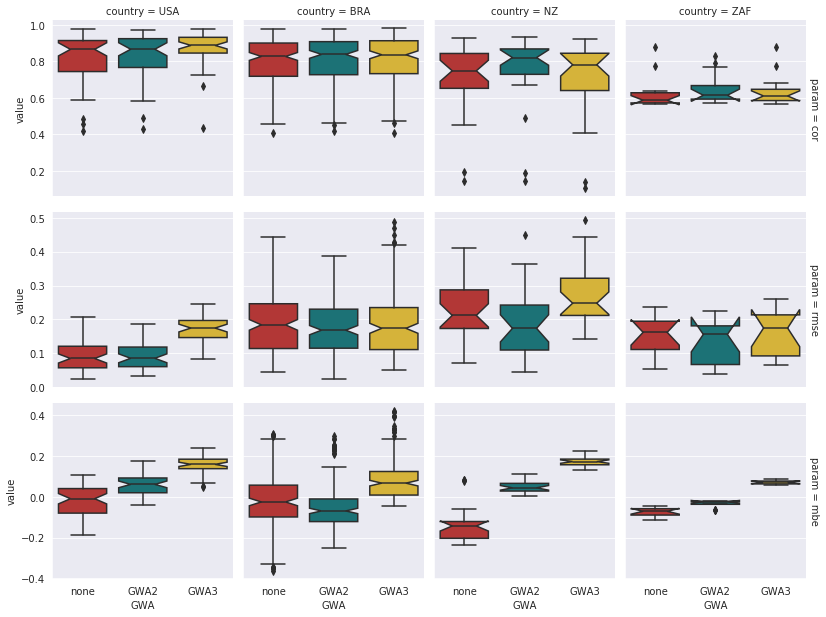

In [110]:
res = results[(results.param!='avg')&(results.dataset=='ERA5')]
sns.catplot(x = 'GWA', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True, sharey='row', notch = True
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.1,left=0.1)
plt.savefig(results_path + '/plots/ERA5_GWA.png')

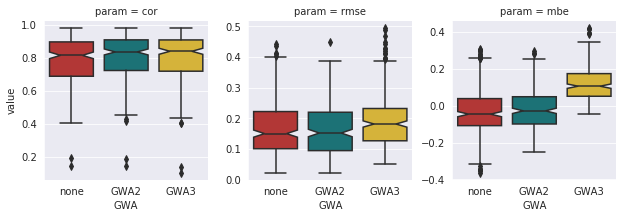

In [6]:
res = results[(results.param!='avg')&(results.dataset=='ERA5')]
sns.catplot(x = 'GWA', y = 'value',col='param',
              kind='box',#hue='dataset',
            height=3, aspect=1,
            data=res, margin_titles=True, sharey=False, notch = True
           )#.set_axis_labels("dataset", "parameter")#.set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.15,left=0.1)
plt.savefig(results_path + '/plots/ERA5_GWA_all.png')

In [ ]:
sns.catplot(x = 'GWA', y = 'value', col='country',
              kind='box',height=3, aspect=1,
            data=results[(results.param=='avg')&(results.dataset=='ERA5')], margin_titles=True, sharey='row')

### 2.1 impact of GWA on MERRA2

Correlation
- impact negligible (but except for NZ GWA2 slightly decreased)

RMSE:
- in BRA decreased by GWA3
- in USA better with GWA2, but worse with GWA3
- in NZ worse with GWA2 and worst with GWA3
- in ZAF slightly better with GWA2

MBE:
- in BRA shift to underestimation instead of overestimation with GWA2, GWA3 decreases error
- in USA better with GWA2, GWA3 increases error
- in NZ worse with GWA2 and worst with GWA3
- in ZAF understimation instead of overestimation with GWA2, slightly worse with GWA3

results are really unclear and vary substantially depending on location
**-> better don't use GWA**


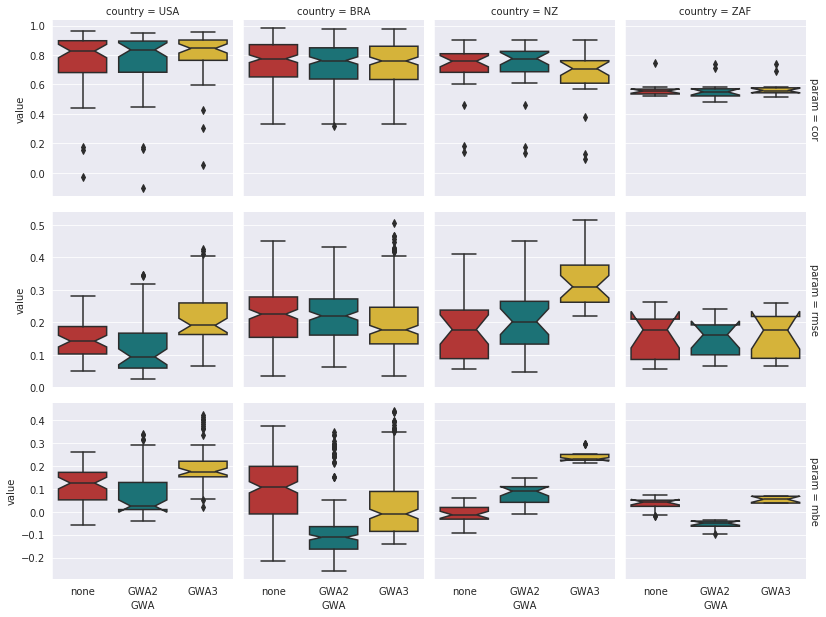

In [113]:
res = results[(results.param!='avg')&(results.dataset=='MERRA2')]
sns.catplot(x = 'GWA', y = 'value', col='country',row='param',
              kind='box', margin_titles=True, sharey='row',
            height=3, aspect=1,
            data=res, notch = True)
plt.subplots_adjust(bottom=0.1,left=0.1)
plt.savefig(results_path + '/plots/MERRA2_GWA.png')

# 3. spatial resolution

- In USA slight tendency of higher correlations and lower error at larger system size

- In Brazil similar, except for second largest group (0.1, 0.2], which seems to perform quite badly (BA partly due to GWA)

- In NZ and ZAF unclear


**no clear conclusion can be drawn on the impact of spatial resolution**

In [ ]:
results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param=='mbe')&(results.country=='BRA')&
        (results.systemsize2==pd.Interval(0.1,0.2,closed='right'))]

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'systemsize2', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'systemsize2', y = 'value', col='param',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

plot only results of Brazil and New Zealand, because only in these regions results on park level - group parks in same category, Brazilian states with New Zealand, and Brazil separately -> 3 sizes:
1. parks (ss < 5)
2. state (5 <= ss < 25)
3. country (ss >= 25)

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


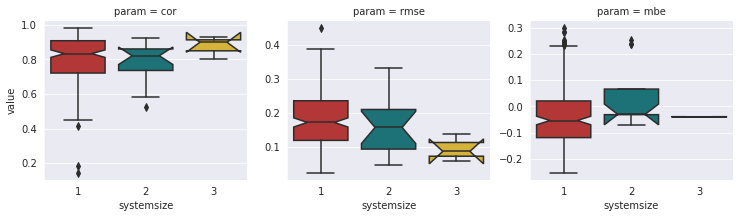

In [7]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')&((results.country=='NZ')|(results.country=='BRA'))]
res['systemsize2'] = 1 + (res.systemsize>4).astype(int) + (res.systemsize>25).astype(int)
sns.catplot(x = 'systemsize2', y = 'value', col='param',
              kind='box',
            height=3, aspect=1.2,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("systemsize", "value")
plt.subplots_adjust(bottom=0.15,left=0.1)
plt.savefig(results_path + '/plots/spatial_resolution_BRA_NZ_all.png')

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


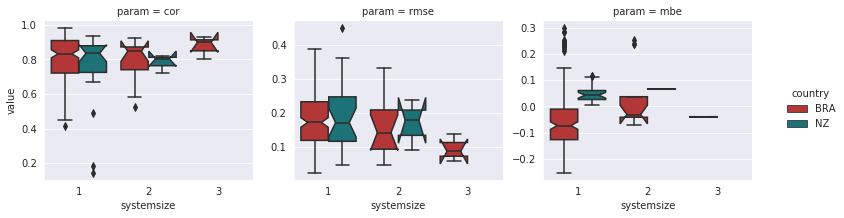

In [8]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')&((results.country=='NZ')|(results.country=='BRA'))]
res['systemsize2'] = 1 + (res.systemsize>4).astype(int) + (res.systemsize>25).astype(int)
sns.catplot(x = 'systemsize2', y = 'value', col='param',hue='country',
              kind='box',
            height=3, aspect=1.2,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("systemsize", "value")
plt.subplots_adjust(bottom=0.15)
plt.savefig(results_path + '/plots/spatial_resolution_BRA_NZ_mbe.png')

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


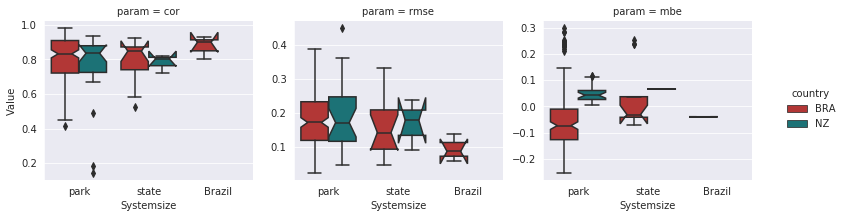

In [4]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')&((results.country=='NZ')|(results.country=='BRA'))]
res['systemsize2'] = 1 + (res.systemsize>4).astype(int) + (res.systemsize>25).astype(int)
res['systemsize3'] = res.systemsize2.map(pd.Series(['park','state','Brazil'],index=[1,2,3]))
sns.catplot(x = 'systemsize3', y = 'value', col='param',hue='country',
              kind='box',
            height=3, aspect=1.2,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("Systemsize", "Value")
plt.subplots_adjust(bottom=0.15)
plt.savefig(results_path + '/plots/spatial_resolution_BRA_NZ_mbe.png')

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


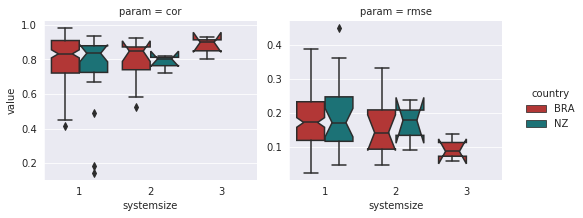

In [9]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param=='cor')|(results.param=='rmse'))&((results.country=='NZ')|(results.country=='BRA'))]
res['systemsize2'] = 1 + (res.systemsize>4).astype(int) + (res.systemsize>25).astype(int)
sns.catplot(x = 'systemsize2', y = 'value', col='param',hue='country',
              kind='box',
            height=3, aspect=1.2,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("systemsize", "value")
plt.subplots_adjust(bottom=0.15)
plt.savefig(results_path + '/plots/spatial_resolution_BRA_NZ.png')

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


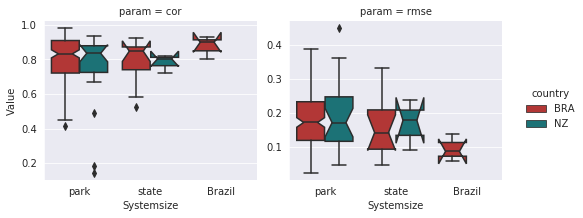

In [5]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param=='cor')|(results.param=='rmse'))&((results.country=='NZ')|(results.country=='BRA'))]
res['systemsize2'] = 1 + (res.systemsize>4).astype(int) + (res.systemsize>25).astype(int)
res['systemsize3'] = res.systemsize2.map(pd.Series(['park','state','Brazil'],index=[1,2,3]))
sns.catplot(x = 'systemsize3', y = 'value', col='param',hue='country',
              kind='box',
            height=3, aspect=1.2,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("Systemsize", "Value")
plt.subplots_adjust(bottom=0.15)
plt.savefig(results_path + '/plots/spatial_resolution_BRA_NZ.png')

#### non normalised system sizes

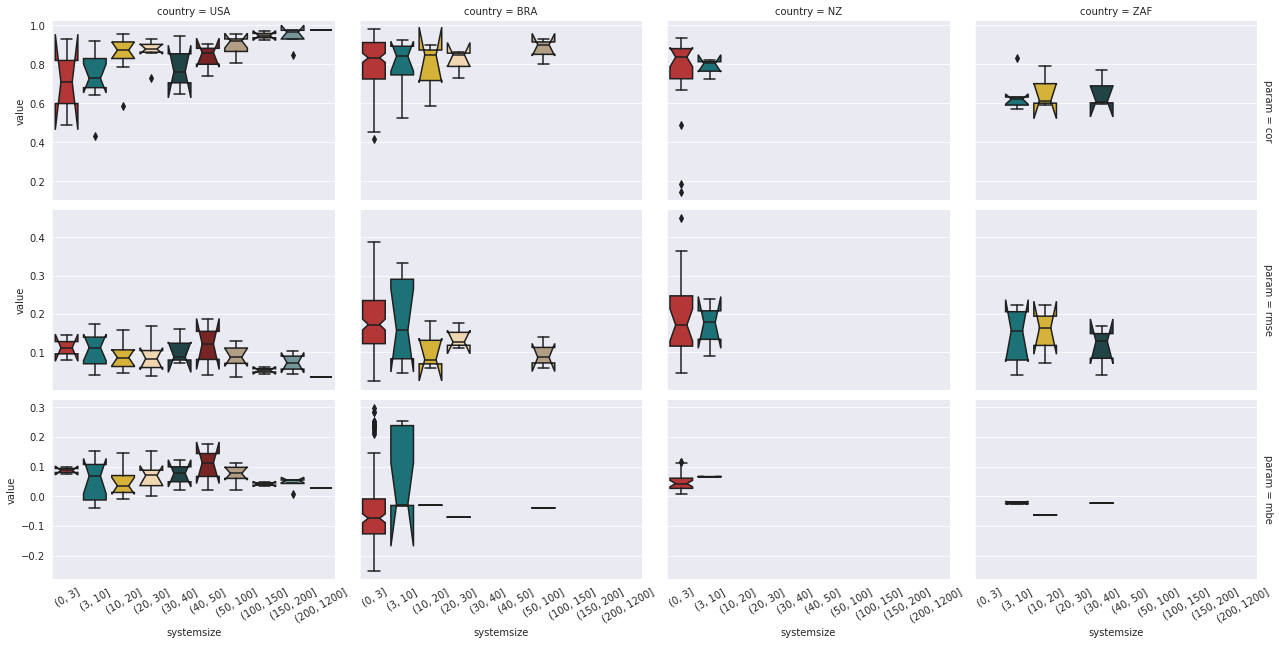

In [11]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'systemsize3', y = 'value', col='country',row='param',
              kind='box',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "value").set_xticklabels(rotation=30)
plt.subplots_adjust(bottom=0.1,left=0.05)
plt.savefig(results_path + '/plots/spatial_resolution.png')

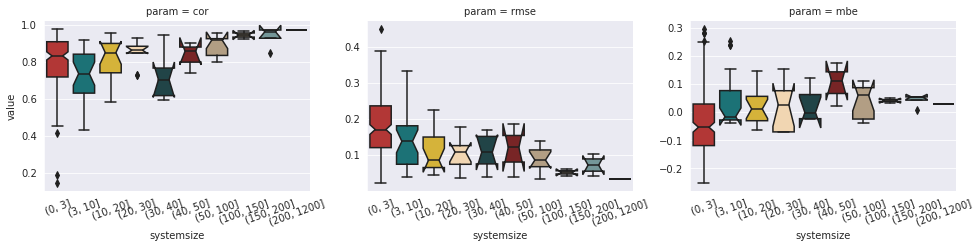

In [10]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param!='avg')]
sns.catplot(x = 'systemsize3', y = 'value', col='param',
              kind='box',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False, notch = True
           ).set_axis_labels("systemsize", "value").set_xticklabels(rotation=20)
plt.subplots_adjust(bottom=0.1)
plt.savefig(results_path + '/plots/spatial_resolution_all.png')

#### results without GWA

- In USA slight tendency of higher correlations and lower error at larger system size
- rest unclear

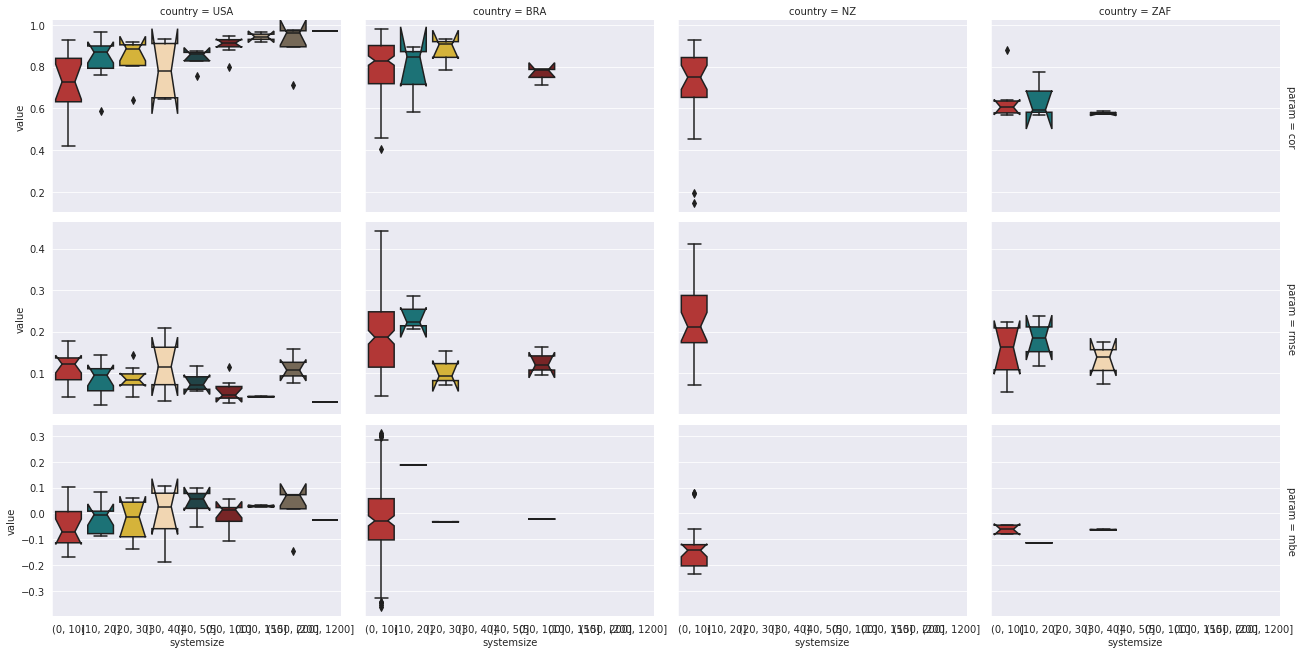

In [41]:
res = results[(results.dataset=='ERA5')&(results.GWA=='none')&(results.param!='avg')]
sns.catplot(x = 'systemsize3', y = 'value', col='country',row='param',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

#### split by temporal resolution

- If split by temporal resolution only in USA better results at lower spatial resolution
- other countries mostly lower RMSE at lwoer spatial resolution
- but no trend for correlations

**error is reduced but correlatoin not necessarily increased**

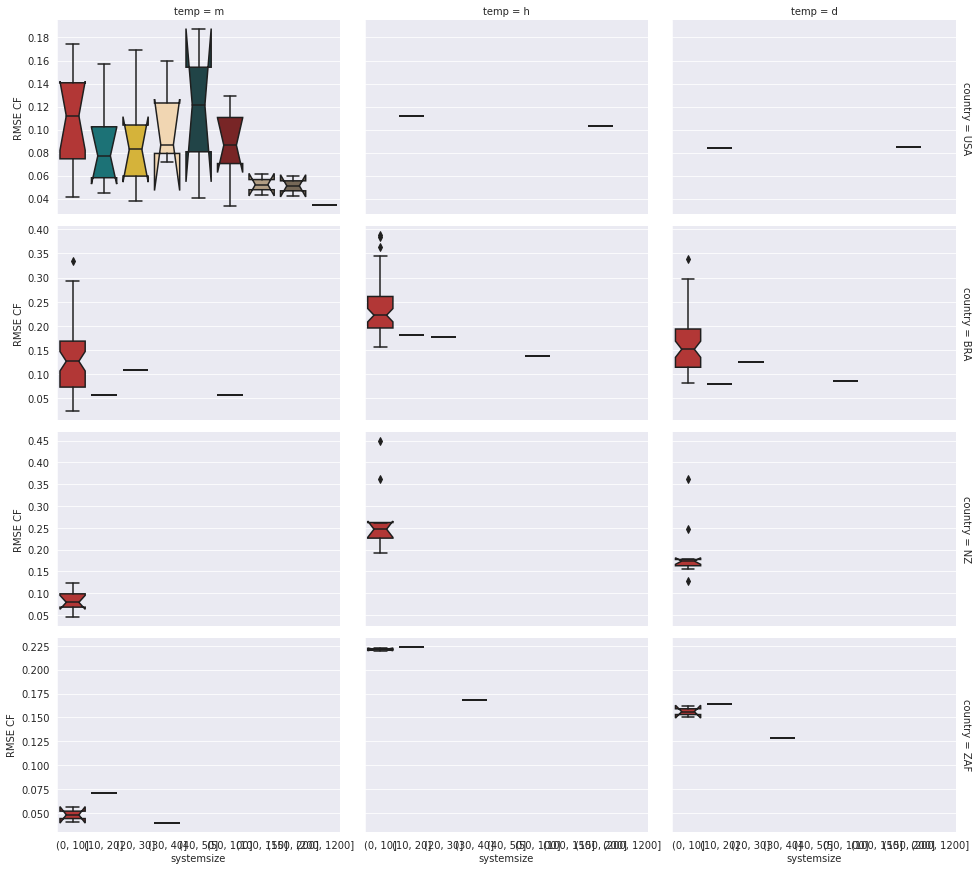

In [42]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param=='rmse')]
sns.catplot(x = 'systemsize3', y = 'value', col='temp',row='country',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "RMSE CF")#.set_xticklabels(rotation=20)

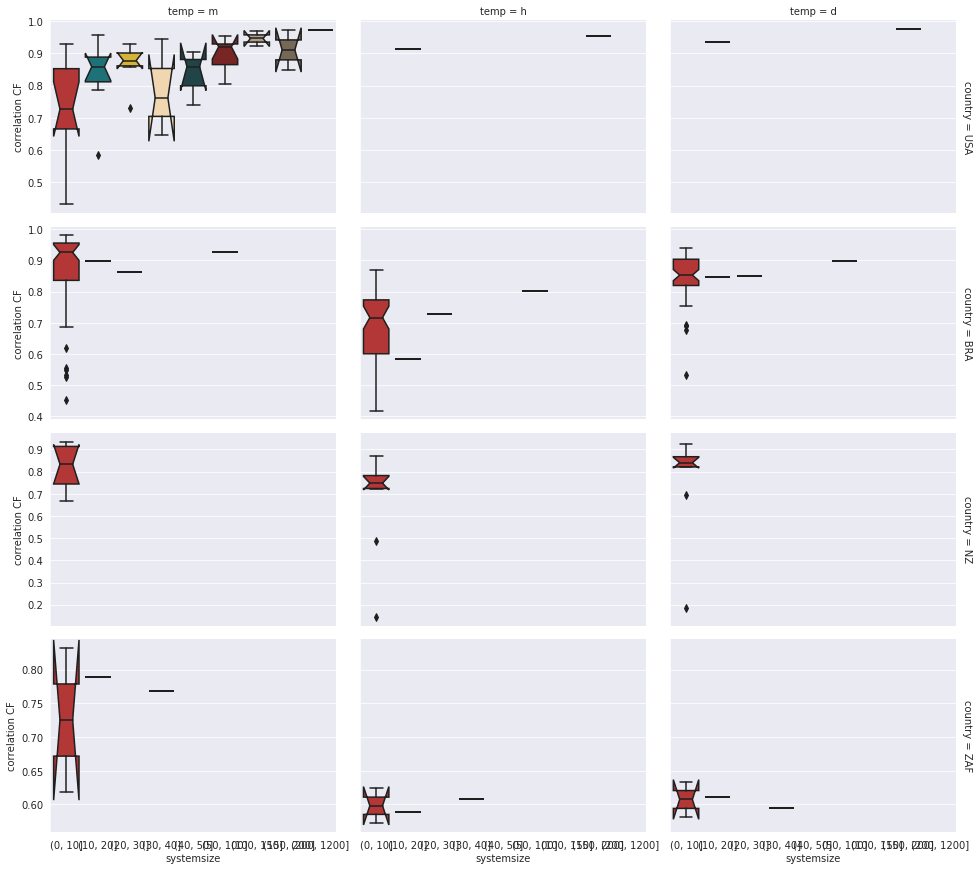

In [43]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&(results.param=='cor')]
sns.catplot(x = 'systemsize3', y = 'value', col='temp',row='country',
              kind='box',#hue='dataset',
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True
           ).set_axis_labels("systemsize", "correlation CF")#.set_xticklabels(rotation=20)

# 4. temporal resolution

only use TX and BPA in USA

clear tendency: correlations are reduced and RMSEs increased when increasing the temporal resolution

only in USA monthly correlation is lower than daily or hourly

(no MBE because should be same hourly and daily, but only slightly different monthly due to different month lengths)

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='none')&(results.param!='avg')&((results.region=='BPA')|(results.region=='TX')|(results.country!='USA'))]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False)#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

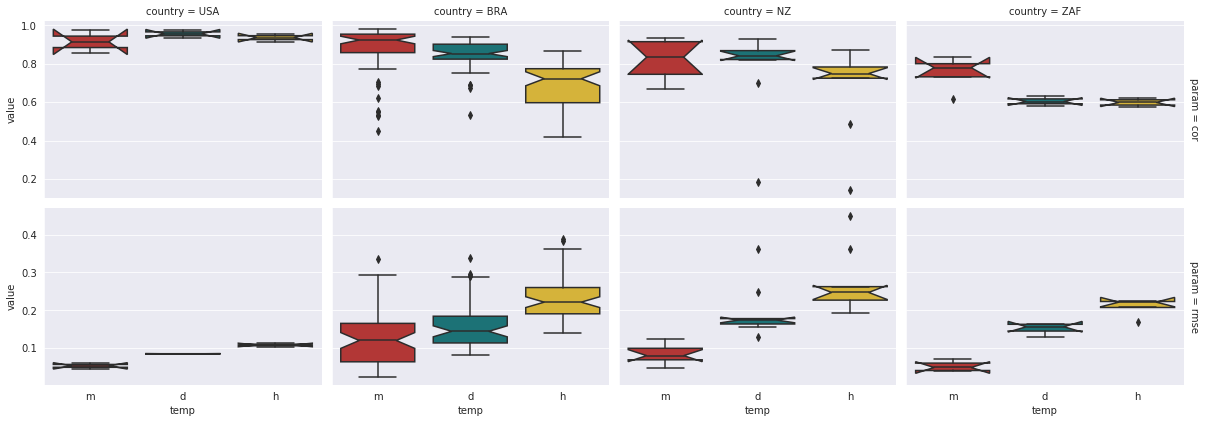

In [11]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param=='cor')|(results.param=='rmse'))&
              ((results.region=='BPA')|(results.region=='TX')|(results.country!='USA'))]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True)
plt.subplots_adjust(bottom=0.1,left=0.1)
plt.savefig(results_path + '/plots/temporal_resolution.png')

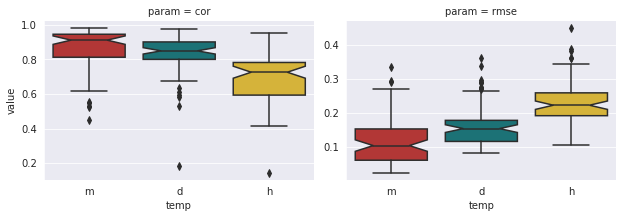

In [12]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param=='cor')|(results.param=='rmse'))&
              ((results.region=='BPA')|(results.region=='TX')|(results.country!='USA'))]
sns.catplot(x = 'temp', y = 'value', col='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False, notch = True)
plt.subplots_adjust(bottom=0.15,left=0.1)
plt.savefig(results_path + '/plots/temporal_resolution_all.png')

In [4]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param=='cor')|(results.param=='rmse'))&
              ((results.region=='BPA')|(results.region=='TX')|(results.country!='USA'))]

In [8]:
res[(res.param=='cor')&(res.temp=='m')].median()

systemsize    1.000000
value         0.911644
dtype: float64

In [9]:
res[(res.param=='cor')&(res.temp=='d')].median()

systemsize    1.000000
value         0.849711
dtype: float64

In [10]:
res[(res.param=='cor')&(res.temp=='h')].median()

systemsize    1.000000
value         0.726097
dtype: float64

In [ ]:
res = results[(results.dataset=='ERA5')&(results.GWA=='GWA2')&((results.param!='avg'))&((results.region=='BPA')|(results.region=='TX')|(results.country!='USA'))]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey=False)#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)

#### use all USA

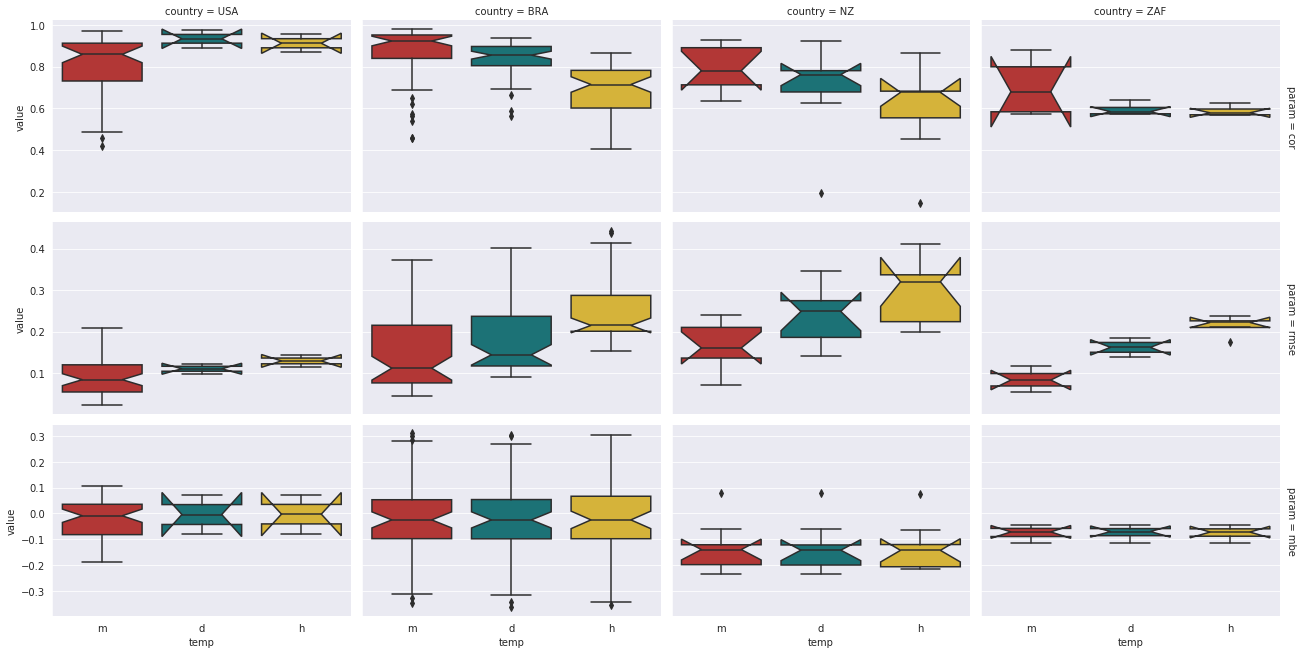

In [46]:
res = results[(results.dataset=='ERA5')&(results.GWA=='none')&(results.param!='avg')]
sns.catplot(x = 'temp', y = 'value', col='country',row='param',
              kind='box',order=['m','d','h'],
            height=3, aspect=1.5,
            data=res, margin_titles=True, sharey='row', notch = True)#.set_axis_labels("systemsize", "value")#.set_xticklabels(rotation=20)